In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
data.shape

(500, 9)

In [6]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [7]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score']= data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']= data['GRE Score'].fillna(data['GRE Score'].mean())

In [8]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
data = data.drop(columns =['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


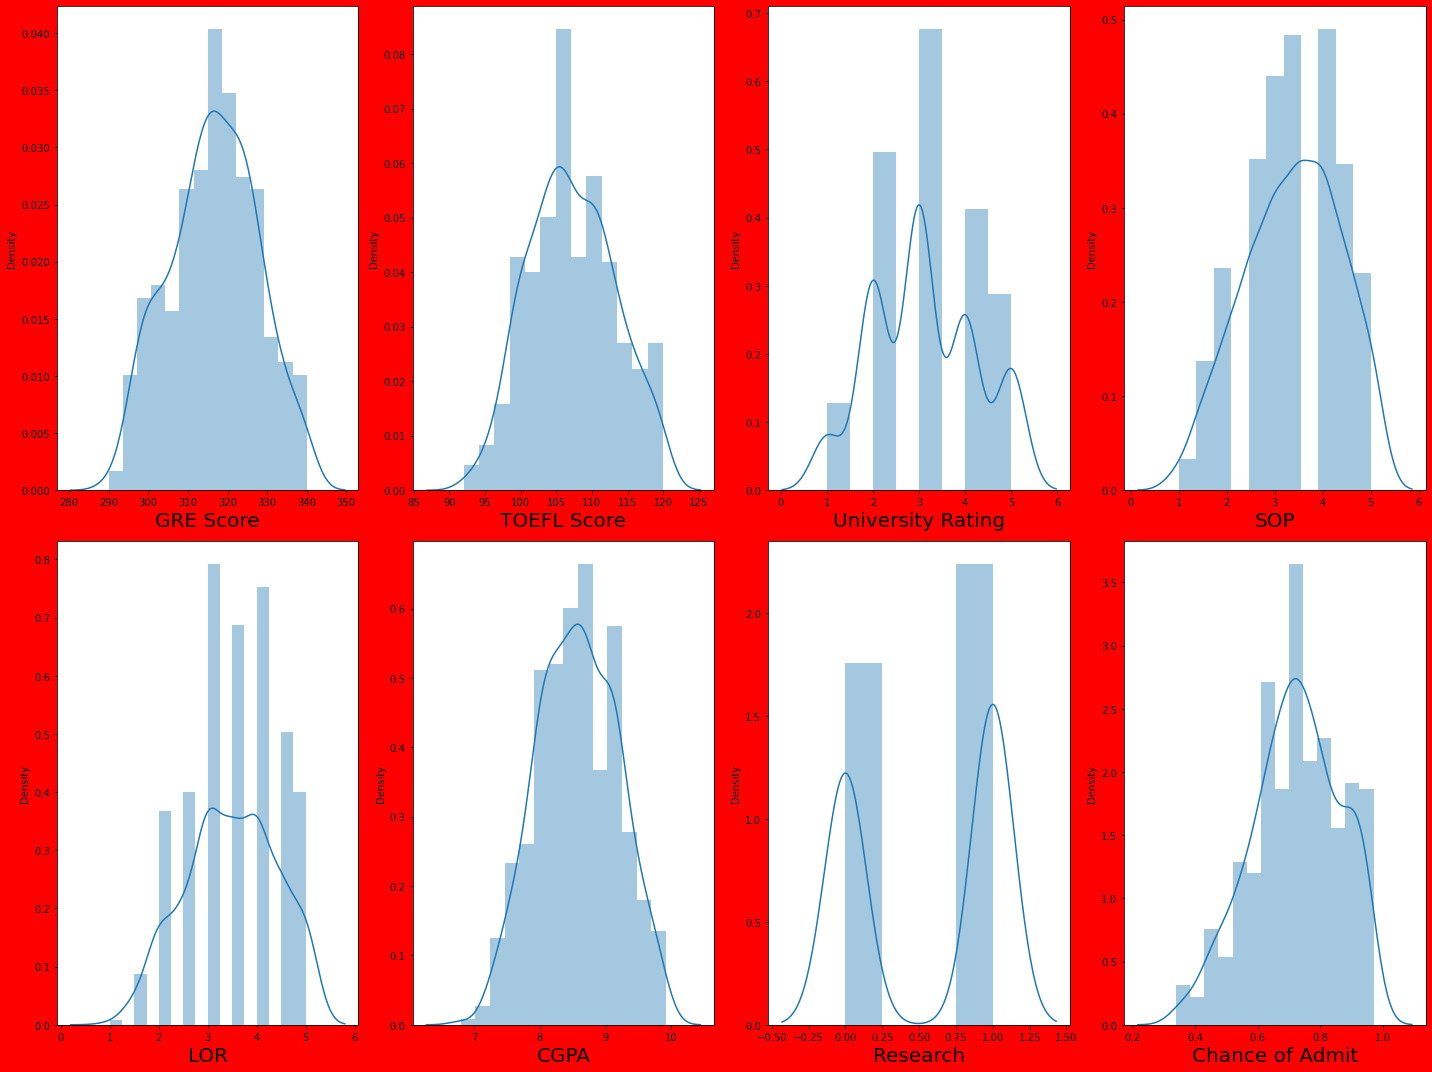

In [10]:
#lets visualize and analyse the data

plt.figure(figsize=(20,15),facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [11]:
y = data['Chance of Admit']
X = data.drop(columns=['Chance of Admit'])

In [12]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [14]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


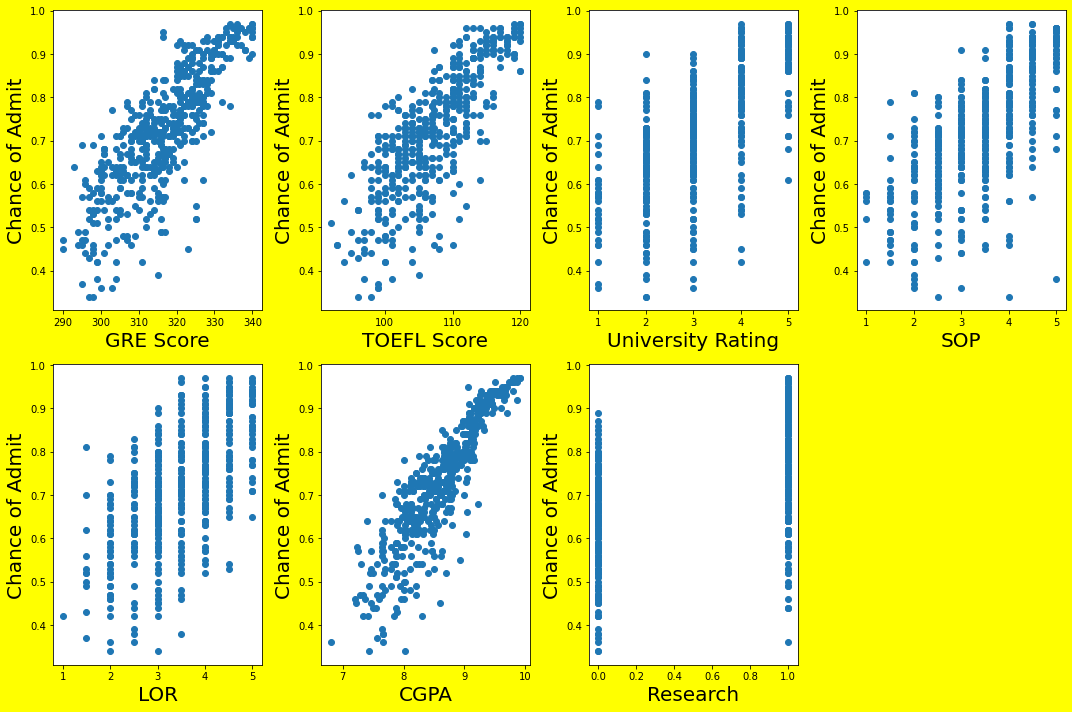

In [15]:
#visualising relationship
plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1

for column in X:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [16]:
#Data scaling Z=(X-mean)/std

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=40)

In [18]:
y_train.head()

321    0.73
229    0.82
172    0.86
65     0.55
37     0.58
Name: Chance of Admit, dtype: float64

In [19]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [20]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [21]:
#since we already fit the data,now we can transform the data
print('Chance of Admit is:',regression.predict(scaler.transform([[312.0,103.0,4.0,4.0,5.0,8.43,0]])))

Chance of Admit is: [0.70081892]


In [22]:
#saving the model to local file system
filename='admissionfinal_model.pickle'
pickle.dump(regression,open(filename,'wb'))



In [25]:
#pediction using saved model
loaded_model= pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[312.0,103.0,4.0,4.0,5.0,8.43,0]]))
a

array([0.70081892])

In [26]:
#Adjusted R2 score
regression.score(x_train,y_train)

0.818780446551055

In [27]:
regression.score(x_test,y_test)

0.8233905805693439

In [29]:
#lets plot and visualize
y_pred=regression.predict(x_test)
y_pred

array([0.63838765, 0.58785317, 0.6062193 , 0.94108578, 0.68274187,
       0.58560216, 0.76469707, 0.48037536, 0.65893035, 0.5686597 ,
       0.81715821, 0.7862815 , 0.51375301, 0.64231431, 0.67555872,
       0.65285714, 0.58352823, 0.54478978, 0.62362416, 0.80335194,
       0.69350646, 0.71944433, 0.76131535, 0.66035604, 0.95158535,
       0.75108038, 0.77070706, 0.89791201, 0.85914486, 0.59625519,
       0.79370066, 0.58216074, 0.76843799, 0.4963726 , 0.75250044,
       0.94862736, 0.61452635, 0.88327973, 0.61895855, 0.85930506,
       0.94175733, 0.62128002, 0.95630885, 0.8289174 , 0.61544317,
       0.90529666, 0.69657144, 0.85017785, 0.77853661, 0.62093124,
       0.63873418, 0.69666571, 0.88266828, 0.86650586, 0.85438962,
       0.81936821, 0.87318166, 0.84639943, 0.61807301, 0.6506554 ,
       0.84764164, 0.74499222, 0.72646328, 0.73548466, 0.83522546,
       0.65032976, 0.78404761, 0.69373947, 0.6317886 , 0.88475069,
       0.66113862, 0.65427669, 0.88359651, 0.74118806, 0.90771

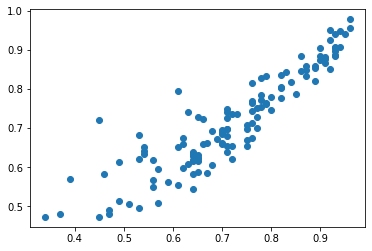

In [30]:
plt.scatter(y_test,y_pred)
plt.xlabel='Actual chance of admission'
plt.ylabel='Predicted chance of admission'
plt.title='Actual vs model Predicted '
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [32]:
y_pred = regression.predict(x_test)

In [33]:
 mean_squared_error(y_test,y_pred)

0.003643127361522683

In [34]:
mean_absolute_error(y_test,y_pred)

0.0435443853232163

In [35]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.060358324707721

In [36]:
#regularization to chk whether model is overfitting or not

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [37]:
lasscv = LassoCV(alphas=None,max_iter=100,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [38]:
alpha =lasscv.alpha_
alpha

6.82732865544461e-06

In [39]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=6.82732865544461e-06)

In [40]:
lasso_reg.score(x_test,y_test)

0.8233856884575557

In [50]:
#RidgeCV
ridgecv =RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)


RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [54]:

ridgecv.alpha_

0.020999999999999998

In [58]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.020999999999999998)

In [56]:
ridge_model.score(x_test,y_test)

0.8233855729388234